<div align="center" style="color:red;font-size:20px">Dimensionality Reducing Using PCA and LDA</div>

### Task1

In [31]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#importing dataset
from sklearn.datasets import load_wine

In [3]:
a=load_wine()

In [4]:
df=pd.DataFrame(a.data,columns=a.feature_names)

In [5]:
df["target"]=a.target

In [6]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

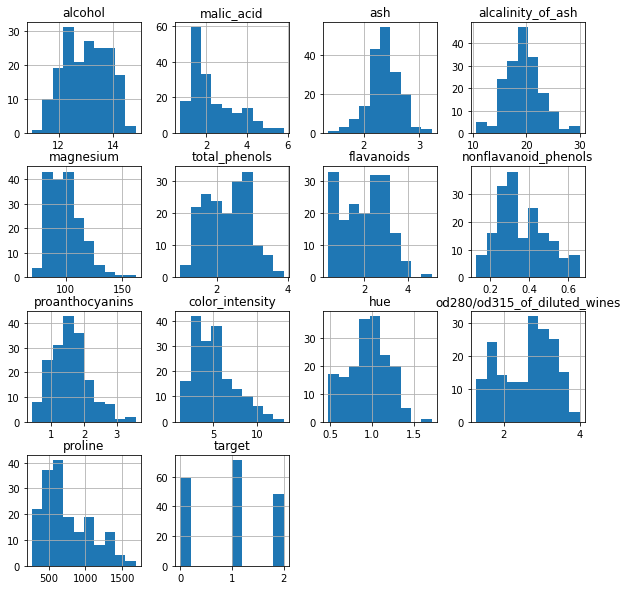

In [7]:
#checking distribution
df.hist(figsize=(10,10))
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [9]:
x=df.iloc[:,:-1]
y=df["target"]

In [10]:
#scaling
x=pd.DataFrame(StandardScaler().fit_transform(x),columns=x.columns)

In [11]:
x.head()

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051                      1.113449  0.965242  
2         0.269020  0.318304                      0.788587  1.395148  
3         1.186068 -0.427544                      1.184071  2.334574  
4        -0.319276  0.362177                      0.449601 -0.037874

### Task2

Using Dimension Reduction Algorithms to get reduced data
 - PCA
 - LDA 

#### PCA:

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca=PCA(n_components=2)
reduced_x=pca.fit_transform(x)

In [14]:
#reduced x
reduced_x[:5,:]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [15]:
#first component carries 36% information and second component carries 19% info
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

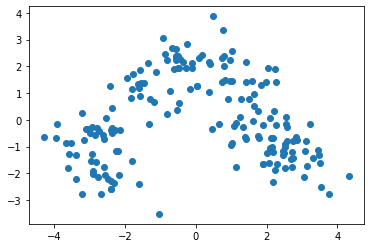

In [16]:
#how reduced data is scattered
plt.scatter(reduced_x[:,0],reduced_x[:,1])

#### LDA:

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [18]:
#data has 3 class labels
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [19]:
#using n-1 clusters i.e.3-1=2
lda=LinearDiscriminantAnalysis(n_components=2)

In [20]:
reduced_x_lda=lda.fit_transform(x,y)

In [21]:
#reduced features
reduced_x_lda

array([[ 4.70024401,  1.97913835],
       [ 4.30195811,  1.17041286],
       [ 3.42071952,  1.42910139],
       [ 4.20575366,  4.00287148],
       [ 1.50998168,  0.4512239 ],
       [ 4.51868934,  3.21313756],
       [ 4.52737794,  3.26912179],
       [ 4.14834781,  3.10411765],
       [ 3.86082876,  1.95338263],
       [ 3.36662444,  1.67864327],
       [ 4.80587907,  2.23536271],
       [ 3.42807646,  2.17510939],
       [ 3.66610246,  2.26248961],
       [ 5.58824635,  2.05478773],
       [ 5.50131449,  3.61304865],
       [ 3.18475189,  2.88952528],
       [ 3.28936988,  2.76584266],
       [ 2.99809262,  1.42511132],
       [ 5.24640372,  3.70982655],
       [ 3.13653106,  1.97689922],
       [ 3.57747791,  0.5624599 ],
       [ 1.69077135,  0.91342136],
       [ 4.83515033,  0.9147628 ],
       [ 3.09588961,  0.61735888],
       [ 3.32164716,  0.29847734],
       [ 2.14482223,  0.16369247],
       [ 3.9824285 ,  2.17515679],
       [ 2.68591432,  1.21850924],
       [ 3.56309464,

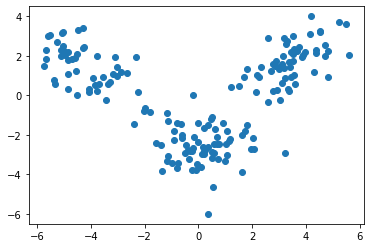

In [22]:
#scatterplot of reduced data
plt.scatter(reduced_x_lda[:,0],reduced_x_lda[:,1])

In [23]:
#since we are doing clustering , i will  be using PCA 

### Task3

#### K Means : Using Dimension Reduced from PCA data and original data

In [24]:
from sklearn.cluster import KMeans

In [25]:
#reduced data
model=KMeans(n_clusters=3).fit(reduced_x)

In [26]:
labels=model.labels_

<AxesSubplot:>

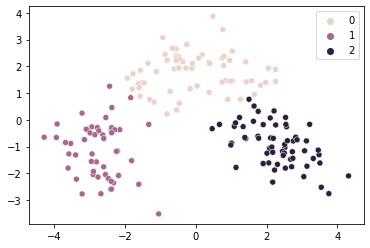

In [32]:
sns.scatterplot(reduced_x[:,0],reduced_x[:,1],hue=labels)

In [ ]:
#we have see how neatly it is clustered for reduced data

In [28]:
#silhouette score
silhouette_score(reduced_x,labels)

0.5615238075263915

In [ ]:
#Clustering on original dataset

In [65]:
x1=x.copy()

In [66]:
#n_clusters=3 since we know class labels=3
model2=KMeans(n_clusters=3).fit(x1)

In [67]:
labels2=model2.labels_

In [68]:
#silhouette score for original data
silhouette_score(x1,labels2)

0.28485891918989864

In [47]:
x1["labels"]=labels2

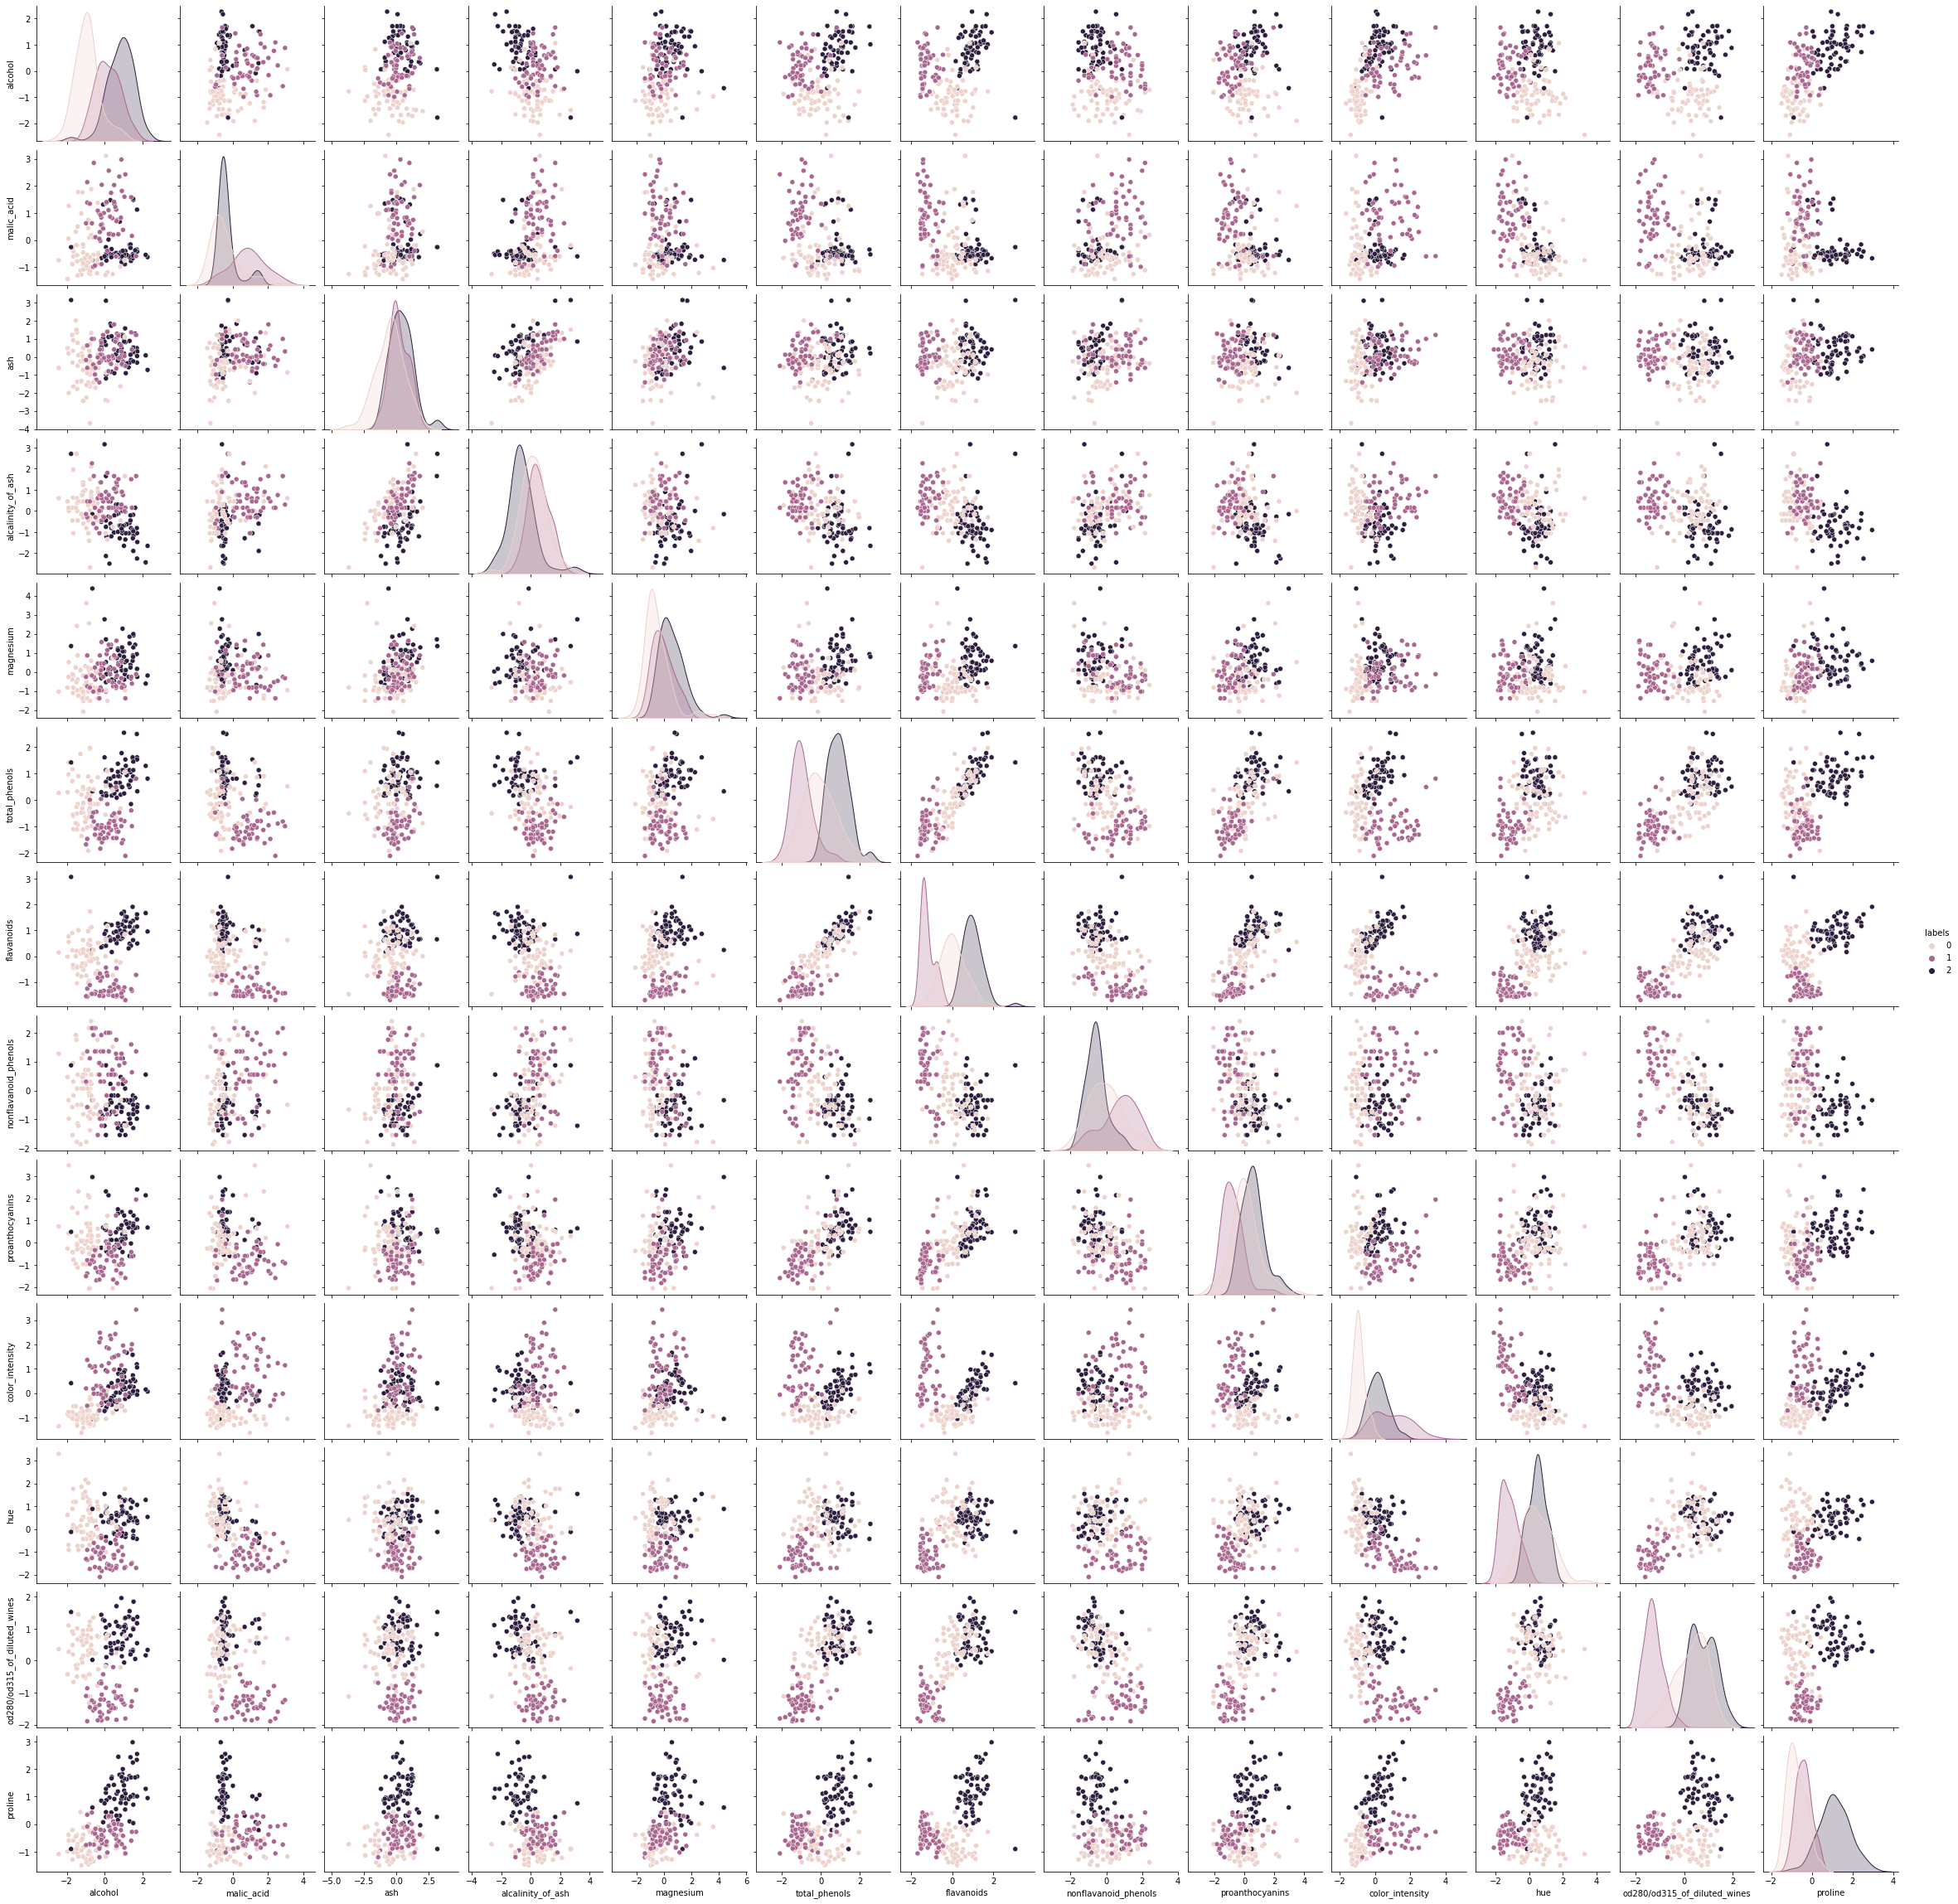

In [49]:
sns.pairplot(x1,hue='labels')

### Task4

#### Agglomerative Hierarchical clustering : Using Dimension Reduced from PCA data and original data

In [51]:
from sklearn.cluster import AgglomerativeClustering

In [53]:
#reduced data with clusters=3 since we know we have 3 class labels
model=AgglomerativeClustering(n_clusters=3).fit(reduced_x)

In [54]:
labels=model.labels_

<AxesSubplot:>

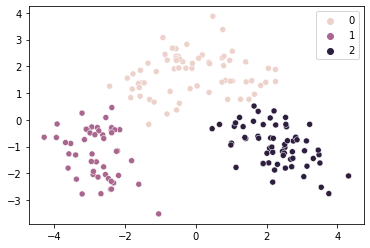

In [55]:
sns.scatterplot(reduced_x[:,0],reduced_x[:,1],hue=labels)

In [56]:
silhouette_score(reduced_x,labels)

0.5590883962040384

In [ ]:
#even agglomerative  clustering is good for this reduced data and also has similar silhoette score like k means

In [57]:
#Agglomerative clustering on original data

In [69]:
x2=x.copy()

In [70]:
model=AgglomerativeClustering(n_clusters=3).fit(x2)

In [71]:
silhouette_score(x2,labels)

0.28125392181839465

In [ ]:
#clustering is not coming out good for original data in both k means and agglomerative clustering

In [72]:
x2['labels']=model.labels_

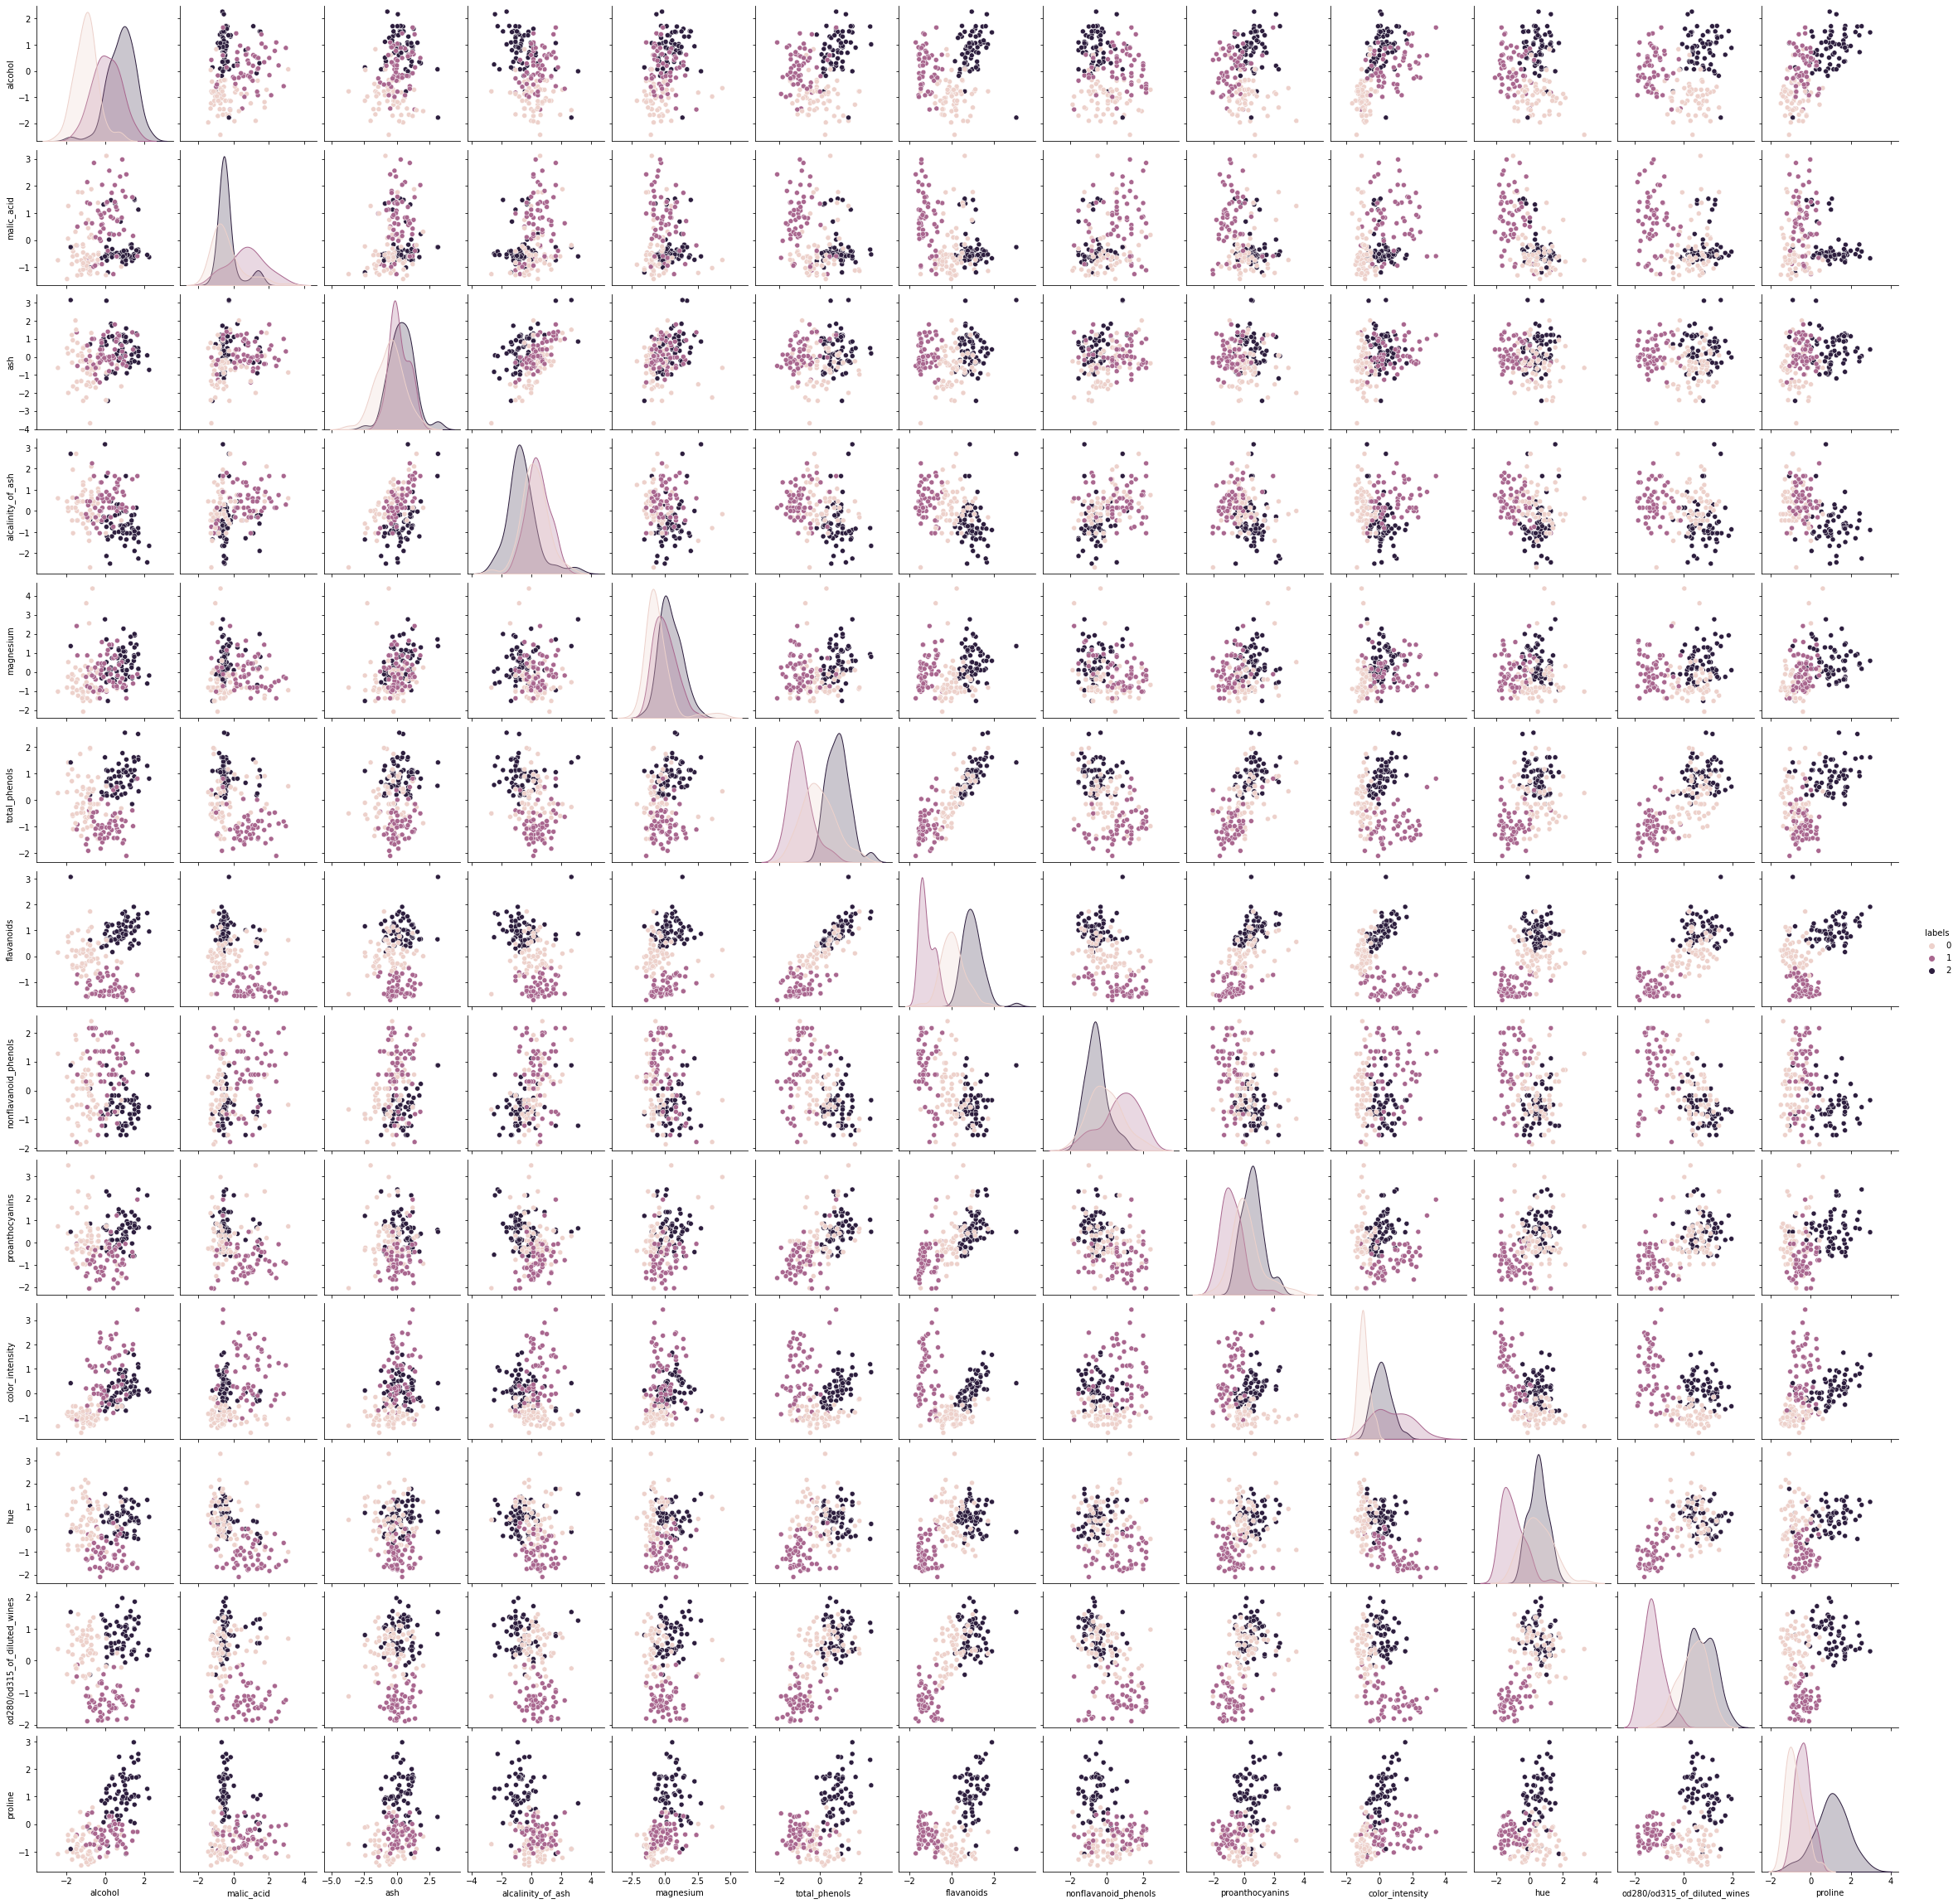

In [73]:
#visualizing all features and datapoints wrt  clusters
sns.pairplot(x2,hue='labels')

### Task5

#### DBSCAN : Using Dimension Reduced from PCA data and original data

In [ ]:
from sklearn.cluster import DBSCAN

In [111]:
from sklearn.neighbors import NearestNeighbors

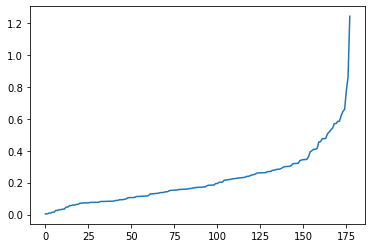

In [112]:
#since we know clusters=3 lets tune eps and min_samples to get 3 clusters properly
nn=NearestNeighbors(n_neighbors=2).fit(reduced_x)
distances,indices=nn.kneighbors(reduced_x)
distances[:,1].sort()
plt.plot(distances[:,1])

In [ ]:
#from this k distance graph we can consider eps around 0.4. but to tune it i will use from 0.3-0.5 

In [113]:
for eps in np.arange(0.3,0.5,0.1):
    for ms in np.arange(2,15):
        model=DBSCAN(eps=eps,min_samples=ms).fit(reduced_x)
        labels=model.labels_
        if len(np.unique(labels))==4:
            print(eps,"****",ms)
            print(np.unique(labels,return_counts=True))
            print(silhouette_score(reduced_x,labels))
            print("----")

0.3 **** 7
(array([-1,  0,  1,  2], dtype=int64), array([147,   9,  12,  10], dtype=int64))
-0.330597091068734
----
0.4 **** 10
(array([-1,  0,  1,  2], dtype=int64), array([133,  15,  16,  14], dtype=int64))
-0.20364889770883904
----
0.4 **** 11
(array([-1,  0,  1,  2], dtype=int64), array([140,  11,  15,  12], dtype=int64))
-0.2683545813599474
----


In [ ]:
#considering eps as 0.4 and min_samples as 10 to get 3 clusters

<AxesSubplot:>

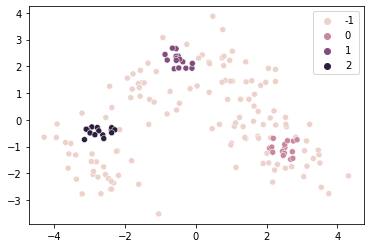

In [114]:
model=DBSCAN(eps=0.4,min_samples=10).fit(reduced_x)
labels=model.labels_
sns.scatterplot(reduced_x[:,0],reduced_x[:,1],hue=labels)

In [ ]:
#this is not a good clustering technique for our dataset even after dimensionally reducing and silhouette score is -0.2 

In [115]:
#With original data
x3=x.copy()

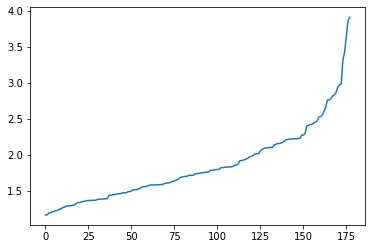

In [116]:
#plotting k distance graph to select eps
nn=NearestNeighbors(n_neighbors=2).fit(x3)
distances,indices=nn.kneighbors(x3)
distances[:,1].sort()
plt.plot(distances[:,1])

In [119]:
#selecting eps from 2-3 as per  k distance graph 
for eps in np.arange(2,3,0.1):
    for ms in np.arange(2,15):
        model=DBSCAN(eps=eps,min_samples=ms).fit(x3)
        labels=model.labels_
        if len(np.unique(labels))==4:
            print(eps,"****",ms)
            print(np.unique(labels,return_counts=True))
            print(silhouette_score(x3,labels))
            print("----")

2.0 **** 6
(array([-1,  0,  1,  2], dtype=int64), array([100,  62,   8,   8], dtype=int64))
-0.050778606609269646
----
2.0 **** 7
(array([-1,  0,  1,  2], dtype=int64), array([110,  47,  13,   8], dtype=int64))
-0.027448250143437502
----
2.0 **** 8
(array([-1,  0,  1,  2], dtype=int64), array([117,  45,   8,   8], dtype=int64))
-0.062497816633526874
----
2.1 **** 4
(array([-1,  0,  1,  2], dtype=int64), array([57, 84, 13, 24], dtype=int64))
0.05456158736198716
----
2.1 **** 5
(array([-1,  0,  1,  2], dtype=int64), array([62, 82, 13, 21], dtype=int64))
0.0485804746870705
----
2.1 **** 6
(array([-1,  0,  1,  2], dtype=int64), array([70, 80, 17, 11], dtype=int64))
0.03195521550757834
----
2.1 **** 7
(array([-1,  0,  1,  2], dtype=int64), array([77, 77, 17,  7], dtype=int64))
0.01571293749121319
----
2.1 **** 8
(array([-1,  0,  1,  2], dtype=int64), array([94, 67,  5, 12], dtype=int64))
-0.044018790414436786
----
2.2 **** 3
(array([-1,  0,  1,  2], dtype=int64), array([44, 90,  3, 41], dty

In [ ]:
#selected  eps and min samples wrt cluster=3 and best silhoueete score

In [120]:
#now applying dbscan with selected eps=2.4 and min samples as 2
model=DBSCAN(eps=2.4,min_samples=2).fit(x3)
labels=model.labels_

In [121]:
silhouette_score(x3,labels)

0.19354862038319326

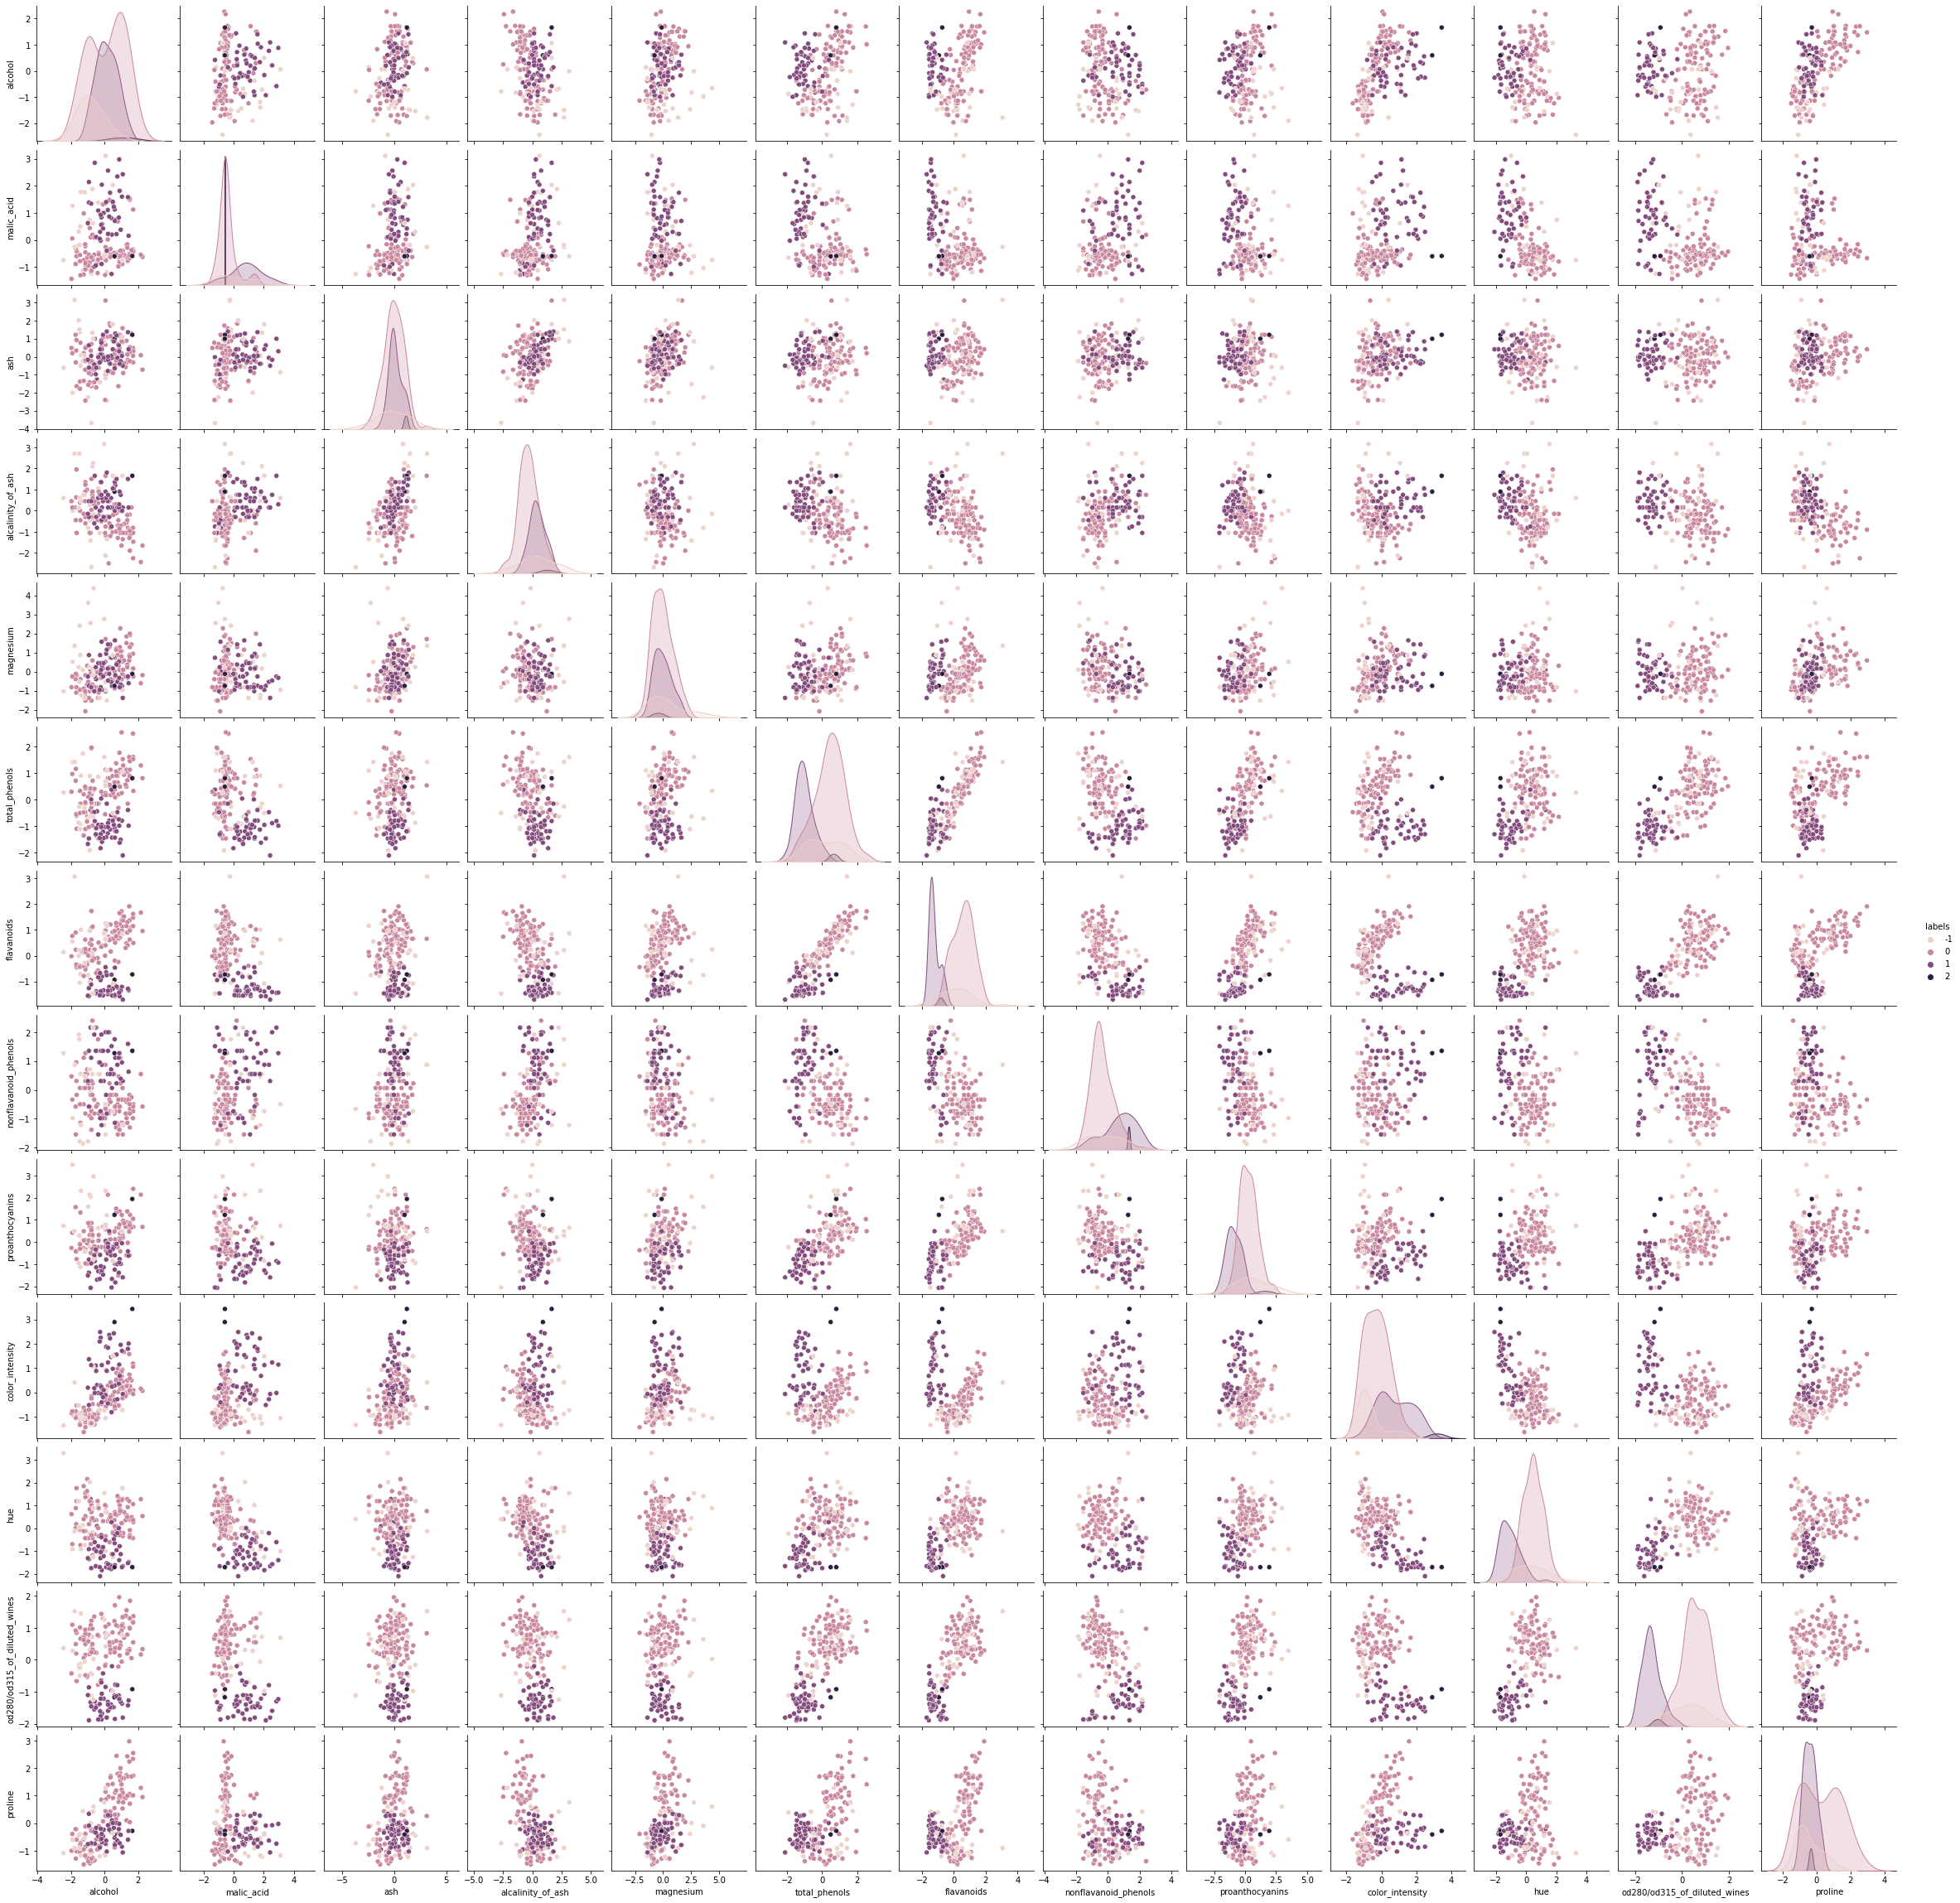

In [124]:
x3["labels"]=labels
sns.pairplot(x3,hue='labels')

In [ ]:
#from using both reduced data and original data on dbscan we can see it is not forming clusters properly
#so for this data set it is not suitale to use dbscan

- When Using Dimensionally Reduced Data for clustering ,got good silhouette scores and hence the clusters
- DBSCAN is not suitable for this not densely packed datapoints since it has considered most as outliers
- Agglomerative and also K means using the reduced data got good clusters with good silhouette score of 0.56